## Data Exploration
### Simplified Occurrence Dataset

#### Column Variable Info
- 'id': unique id for each entry
- 'day': Day of the month of encounter.
- 'month': Month of sighting or interaction
- 'year': Year of recorded encounter
- 'eventDate': date of event, yyyy-mm
- 'decimalLatitude': Latitude coordinates of event location (float)
- 'decimalLongitude': Longitude coordinates of event location (float)
- 'footprintWKT': Geospatial data in WKT (Well-Known Text) format. A single point location expressed as a MultiPoint, with latitude and longitude.
- 'bathymetry': Water depth at a location (often in meters, negative down)
- 'shoredistance': Distance from shore. Unique values for most entries
- 'sss': likely, Sea Surface Salinity
- 'sst': likely, Sea Surface Temperature
- 'occurrenceID': Each ID is unique, but it appears to be the same as 'catalogNumber'
- 'associatedMedia': provides a unique link for each entry, which leaved to anavnet, with what appears to be the mapped location of each siting/interaction
- 'occurrenceRemarks': Comments about the interaction in Portuguese. Mostly repetitive but could still be helpful.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("OccurrenceDataset_simplified.csv")

In [3]:
df.head()

,id,day,month,year,eventDate,decimalLatitude,decimalLongitude,footprintWKT,bathymetry,shoredistance,sss,sst,occurrenceID,associatedMedia,occurrenceRemarks
0,ff3f89a4-518d-4e7c-a2dc-dda812013747,NaN,NaN,2022,2022,38.289937,-9.041748,MultiPoint ((-9.04174800000000012 38.289937000...,743.2,16220.0,35.49,17.10,1020_ANAV_NR_2310/22,https://geoanavnet.hidrografico.pt/coastal-war...,Novos perigos|Animais Marinhos - InteraÁ„o
1,716b10c8-5520-4577-9969-abd9f15b049c,30.0,9.0,2022,2022-09-30,38.238150,-8.856500,MultiPoint ((-8.85650000000000048 38.238149999...,86.6,7067.0,35.50,17.15,1032_ANAV_NR_2317/22,https://geoanavnet.hidrografico.pt/coastal-war...,Novos perigos|Animais Marinhos - InteraÁ„o
2,04513443-a748-4db8-97ff-d7feeb05efe6,NaN,10.0,2022,2022-10,38.190013,-9.040319,MultiLineString ((-8.93188499999999941 37.9311...,158.6,22472.0,35.52,17.19,1060_ANAV_NR_2335/22,https://geoanavnet.hidrografico.pt/coastal-war...,Novos perigos|Animais Marinhos - InteraÁ„o
3,e908ddf8-bfea-416b-bc95-e3014ed35446,NaN,10.0,2022,2022-10,37.022205,-8.738250,MultiPolygon (((-9.01977499999999921 36.908175...,56.0,5857.0,35.79,17.80,1140_ANAV_NR_2385/22,https://geoanavnet.hidrografico.pt/coastal-war...,Requisitos de seguranÁa maritima|Animais Marin...
4,c928f316-1827-4fac-b333-2504a40e8936,NaN,10.0,2022,2022-10,39.362879,-9.441375,MultiPolygon (((-9.59930400000000006 39.249271...,31.2,2824.0,35.27,16.69,1144_ANAV_NR_2387/22,https://geoanavnet.hidrografico.pt/coastal-war...,Requisitos de seguranÁa maritima|Animais Marin...


## Data Exploration - Month and Year

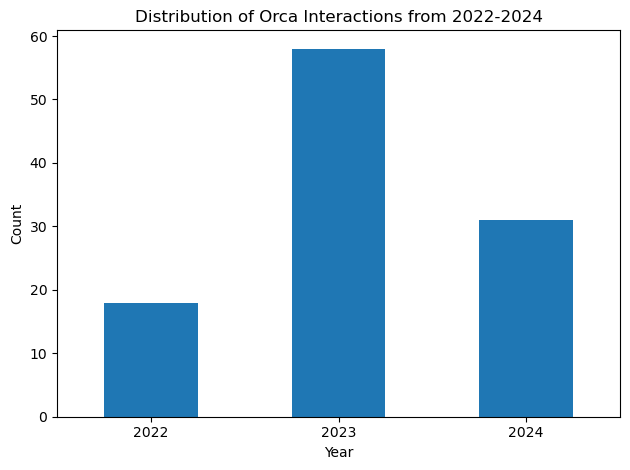

In [4]:
# Save value counts of 'year' as a variable and order dates chronologically 
year_valueCounts = df['year'].value_counts().sort_index()
year_valueCounts

# Plot distribution of interactions by month
year_valueCounts.plot(kind='bar')
plt.title('Distribution of Orca Interactions from 2022-2024')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [5]:
# Clean up 'month' column, removing '.0', and convert to int
df['month'] = df['month'].fillna('0').astype(int)

In [6]:
# Clean up 'day' column, removing '.0', and convert to int
df['day'] = df['day'].fillna('0').astype(int)

In [7]:
df.head(1)

,id,day,month,year,eventDate,decimalLatitude,decimalLongitude,footprintWKT,bathymetry,shoredistance,sss,sst,occurrenceID,associatedMedia,occurrenceRemarks
0,ff3f89a4-518d-4e7c-a2dc-dda812013747,0,0,2022,2022,38.289937,-9.041748,MultiPoint ((-9.04174800000000012 38.289937000...,743.2,16220.0,35.49,17.1,1020_ANAV_NR_2310/22,https://geoanavnet.hidrografico.pt/coastal-war...,Novos perigos|Animais Marinhos - InteraÁ„o


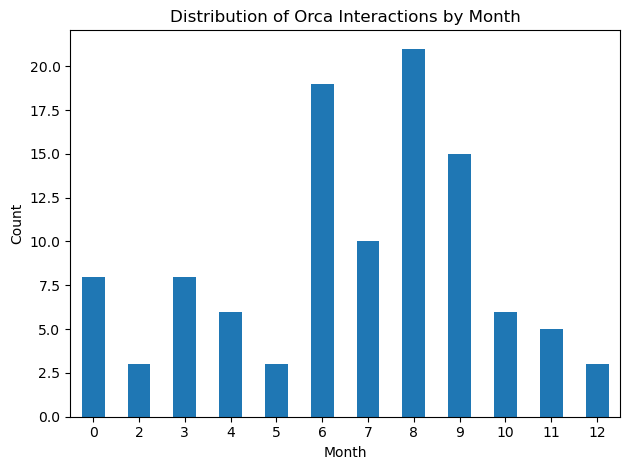

In [8]:
# Save value_counts of 'month' as a variable and order
month_valueCounts = df['month'].value_counts().sort_index()
month_valueCounts

# Plot distribution of interactions by month
month_valueCounts.plot(kind='bar')
plt.title('Distribution of Orca Interactions by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [9]:
# Create new column with month name for plotting 
# month mapping
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df['month_name'] = df['month'].map(month_mapping)

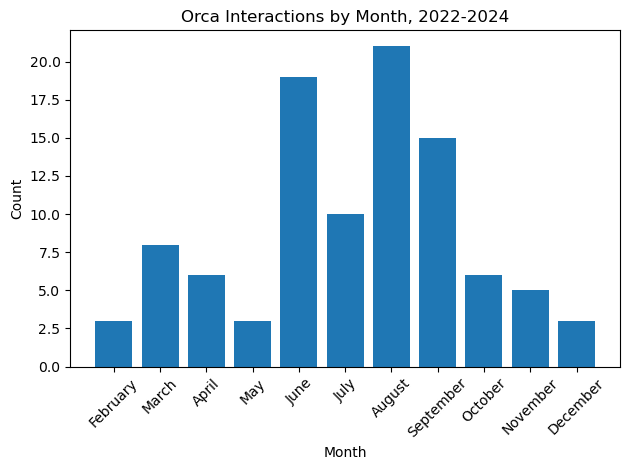

In [10]:
# Orca interactions by month from 2022-2024

# Group by both month number and name, then sort by number
monthly_counts = df. groupby(['month', 'month_name']).size().reset_index(name='count')
monthly_counts = monthly_counts.sort_values('month')

# Plot distribution of interactions by month
plt.bar(monthly_counts['month_name'], monthly_counts['count'])
plt.title('Orca Interactions by Month, 2022-2024')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

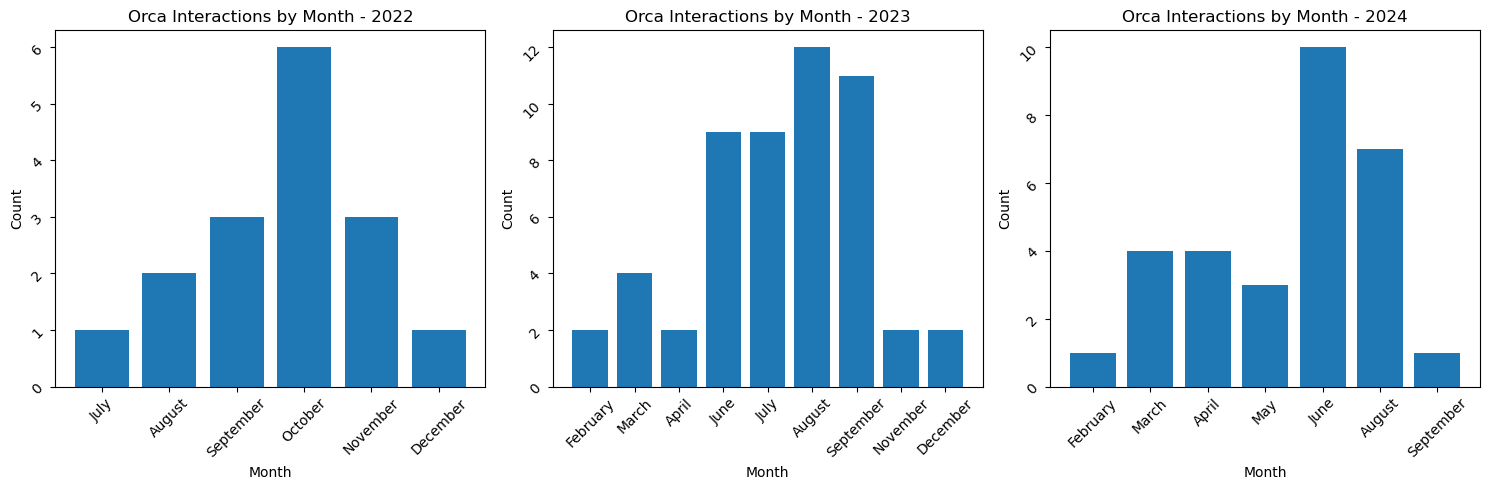

In [11]:
# View Ocra Interactions by Month per Year

# Create a grid for 3 plots
#fig = overall figure holding plots, axes = array of 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
years = [2022, 2023, 2024] #years to plot

for idx, year in enumerate(years): #loops through list and provides index & value (idx=1, year=2022)
    monthly_counts = df[df['year'] == year].groupby(['month', 'month_name']).size().reset_index(name='count')
    monthly_counts = monthly_counts.sort_values('month')
    
    # Plot distribution of interactions by month
    axes[idx].bar(monthly_counts['month_name'], monthly_counts['count'])
    axes[idx].set_title(f'Orca Interactions by Month - {year}')
    axes[idx].set_xlabel('Month')
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(rotation=45)
    
plt.tight_layout()
plt.show()

/Users/haleyegan/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


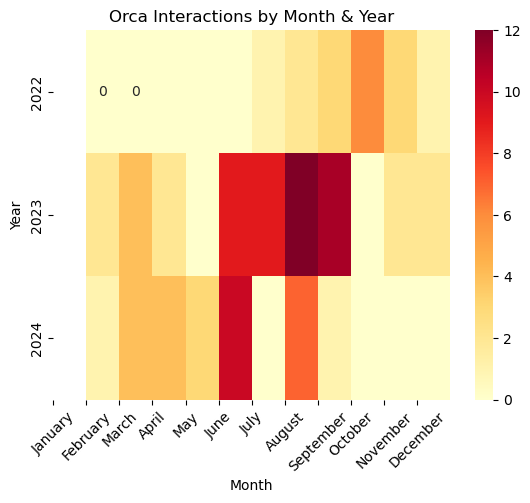

In [12]:
# Map month numbers to names
month_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_labels = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Create pivot using month numbers to ensure correct order
pivot_df = df.groupby(['year', 'month']).size().unstack(fill_value=0)

# Reorder columns numerically
pivot_df = pivot_df.reindex(columns=month_order)

# Plot with month names as x-axis labels
sns.heatmap(pivot_df, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Orca Interactions by Month & Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=range(len(month_order)), labels=month_labels, rotation=45)
plt.show()

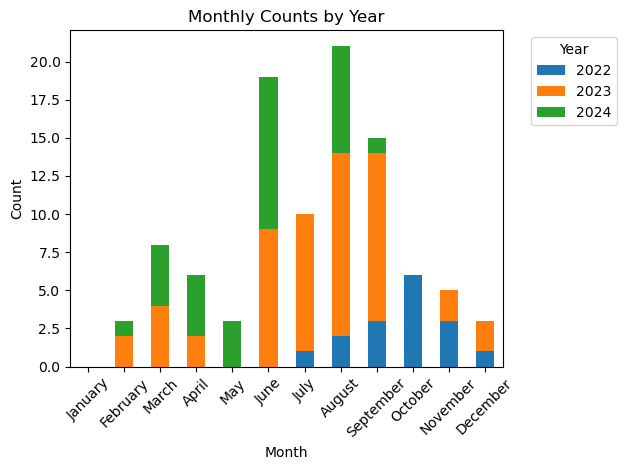

In [13]:
# Group by year and month (numeric)
pivot_df = df.groupby(['year', 'month']).size().unstack(fill_value=0)
# Reorder months (columns)
pivot_df = pivot_df.reindex(columns=month_order)

# Plot as stacked bar chart
pivot_df.T.plot(kind='bar', stacked=True)

# Customize labels
plt.title('Monthly Counts by Year')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=range(len(month_order)), labels=month_labels, rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Notes:
I'm surprised to see orca and human interactions off the Iberian peninsula throughout the year, because the orcas tend to be around the Iberian peninsula in spring and summer, and then move further away during the winter months. The only month that consistantly sees no orca interactions (with this dataset) is January. Though summer months are the most common months for an interaction, from June-September being the most common. In 2022, most interactions were in the latter half of the year, from July-December, while in 2024 interaction were common in the earlier part of the year from February-September. Most interactions occurred in 2023, and were steady throughout the entire year except for January, May, and September. 

In [14]:
# Add a variable to the dataset for total interactions per month
# Calculate total interactions per month for 2022
monthly_totals_2022 = df[df['year'] == 2022].groupby('month').size()

# Map those totals to the entire dataframe
df['total_interactions_per_month_2022'] = df['month'].map(monthly_totals_2022)

# Fill NaN values with 0 (for months that don't exist in 2022 data)
df['total_interactions_per_month_2022'] = df['total_interactions_per_month_2022'].fillna(0)

In [15]:
# Add a variable to the dataset for total interactions per month
# Calculate total interactions per month for 2023
monthly_totals_2023 = df[df['year'] == 2023].groupby('month').size()

# Map those totals to the entire dataframe
df['total_interactions_per_month_2023'] = df['month'].map(monthly_totals_2023)

# Fill NaN values with 0 (for months that don't exist in 2022 data)
df['total_interactions_per_month_2023'] = df['total_interactions_per_month_2023'].fillna(0)

In [16]:
# Add a variable to the dataset for total interactions per month
# Calculate total interactions per month for 2024
monthly_totals_2024 = df[df['year'] == 2024].groupby('month').size()

# Map those totals to the entire dataframe
df['total_interactions_per_month_2024'] = df['month'].map(monthly_totals_2024)

# Fill NaN values with 0 (for months that don't exist in 2022 data)
df['total_interactions_per_month_2024'] = df['total_interactions_per_month_2024'].fillna(0)

In [17]:
df.sample(10)

,id,day,month,year,eventDate,decimalLatitude,decimalLongitude,footprintWKT,bathymetry,shoredistance,sss,sst,occurrenceID,associatedMedia,occurrenceRemarks,month_name,total_interactions_per_month_2022,total_interactions_per_month_2023,total_interactions_per_month_2024
5,3e1e741a-ae20-4d06-89ff-648259cf6b52,0,10,2022,2022-10,36.925181,-8.811863,MultiLineString ((-8.27407799999999938 37.0694...,115.4,13568.0,35.82,17.92,1146_ANAV_NR_2388/22,https://geoanavnet.hidrografico.pt/coastal-war...,Requisitos de seguranÁa maritima|Animais Marin...,October,6.0,0.0,0.0
2,04513443-a748-4db8-97ff-d7feeb05efe6,0,10,2022,2022-10,38.190013,-9.040319,MultiLineString ((-8.93188499999999941 37.9311...,158.6,22472.0,35.52,17.19,1060_ANAV_NR_2335/22,https://geoanavnet.hidrografico.pt/coastal-war...,Novos perigos|Animais Marinhos - InteraÁ„o,October,6.0,0.0,0.0
76,946b0acc-f726-488f-bf39-fa23a0a3966c,18,3,2024,2024-03-18,38.755824,-9.707880,MultiPoint ((-9.7078799999999994 38.7558239999...,83.0,18178.0,35.50,16.90,7816_ANAV_NR_0707/24,https://geoanavnet.hidrografico.pt/coastal-war...,Requisitos de seguranÁa maritima|Animais Marin...,March,0.0,4.0,4.0
4,c928f316-1827-4fac-b333-2504a40e8936,0,10,2022,2022-10,39.362879,-9.441375,MultiPolygon (((-9.59930400000000006 39.249271...,31.2,2824.0,35.27,16.69,1144_ANAV_NR_2387/22,https://geoanavnet.hidrografico.pt/coastal-war...,Requisitos de seguranÁa maritima|Animais Marin...,October,6.0,0.0,0.0
39,3f870fe6-e4a1-4980-b8f9-b91f43aace71,0,7,2023,2023-07,38.385000,-8.885000,MultiPoint ((-8.88499999999999979 38.384999999...,50.8,6334.0,35.44,17.04,4522_ANAV_NR_1479/23,https://geoanavnet.hidrografico.pt/coastal-war...,Novos perigos|Animais Marinhos - Avistamento,July,1.0,9.0,0.0
101,cfbd8ace-de27-4853-a181-924df96e4ec4,22,8,2024,2024-08-22,41.123333,-8.931667,MultiPoint ((-8.93166699999999913 41.123333000...,65.4,19456.0,34.46,15.90,9580_ANAV_NR_1807/24,https://geoanavnet.hidrografico.pt/coastal-war...,Requisitos de seguranÁa maritima|Animais Marin...,August,2.0,12.0,7.0
75,2c22c14b-a5f0-4181-ba70-821d170cf953,12,3,2024,2024-03-12,36.936721,-8.827515,MultiPoint ((-8.827515 36.93672099999999858)),113.2,11680.0,35.82,17.92,7760_ANAV_NR_0674/24,https://geoanavnet.hidrografico.pt/coastal-war...,Requisitos de seguranÁa maritima|Animais Marin...,March,0.0,4.0,4.0
96,18d6364b-4ae9-4cc8-94ca-f8d9170a86e7,0,0,2024,2024,38.439108,-9.106724,MultiPoint ((-9.10952799999999918 38.440531000...,11.0,84.0,35.38,16.98,9372_ANAV_NR_1653/24,https://geoanavnet.hidrografico.pt/coastal-war...,Requisitos de seguranÁa maritima|Outros - Oper...,NaN,2.0,5.0,1.0
44,e62d6da7-8a56-484c-94a9-ada063eeb42d,0,8,2023,2023-08,38.413667,-9.147167,MultiPoint ((-9.1471669999999996 38.4136669999...,95.0,1756.0,35.44,17.05,4604_ANAV_NR_1539/23,https://geoanavnet.hidrografico.pt/coastal-war...,Novos perigos|Animais Marinhos - InteraÁ„o,August,2.0,12.0,7.0
89,6a0fdff5-d1aa-40a3-ab5b-a5e8b0f31e25,18,6,2024,2024-06-18,36.989050,-8.920567,MultiPoint ((-8.92056700000000014 36.989049999...,44.6,1672.0,35.80,17.93,8906_ANAV_NR_1319/24,https://geoanavnet.hidrografico.pt/coastal-war...,Requisitos de seguranÁa maritima|Animais Marin...,June,0.0,9.0,10.0


## Data Exploration - Sea Surface Salinity (sss) & Sea Surface Temperature (sst)

In [18]:
df.head(1)

,id,day,month,year,eventDate,decimalLatitude,decimalLongitude,footprintWKT,bathymetry,shoredistance,sss,sst,occurrenceID,associatedMedia,occurrenceRemarks,month_name,total_interactions_per_month_2022,total_interactions_per_month_2023,total_interactions_per_month_2024
0,ff3f89a4-518d-4e7c-a2dc-dda812013747,0,0,2022,2022,38.289937,-9.041748,MultiPoint ((-9.04174800000000012 38.289937000...,743.2,16220.0,35.49,17.1,1020_ANAV_NR_2310/22,https://geoanavnet.hidrografico.pt/coastal-war...,Novos perigos|Animais Marinhos - InteraÁ„o,NaN,2.0,5.0,1.0


In [19]:
sss_count = df['sss'].value_counts()
#sss_count

In [20]:
df['sss'].describe()

count    106.000000
mean      35.590189
std        0.313536
min       34.140000
25%       35.440000
50%       35.680000
75%       35.797500
max       36.360000
Name: sss, dtype: float64

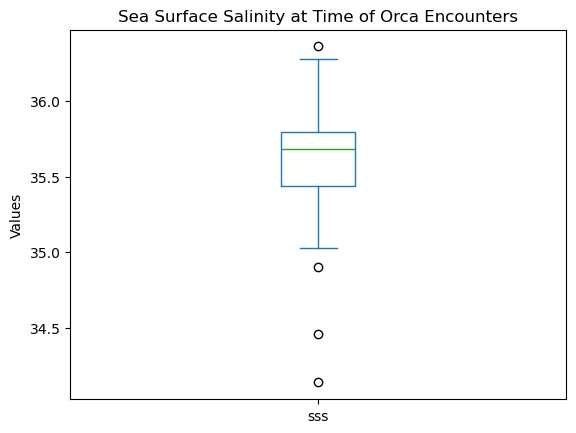

In [21]:
df['sss'].plot(
    kind='box',
    title='Sea Surface Salinity at Time of Orca Encounters',
    ylabel='Values'
)
plt.show()

In [22]:
df['sst'].describe()

count    106.000000
mean      17.505472
std        0.793919
min       15.750000
25%       16.985000
50%       17.355000
75%       18.035000
max       19.420000
Name: sst, dtype: float64

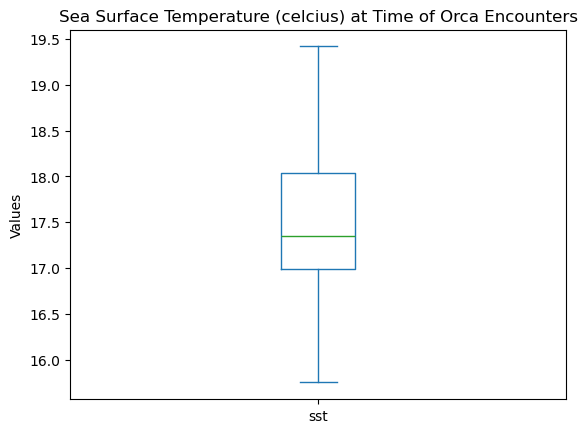

In [23]:
df['sst'].plot(
    kind='box',
    title='Sea Surface Temperature (celcius) at Time of Orca Encounters',
    ylabel='Values'
)
plt.show()

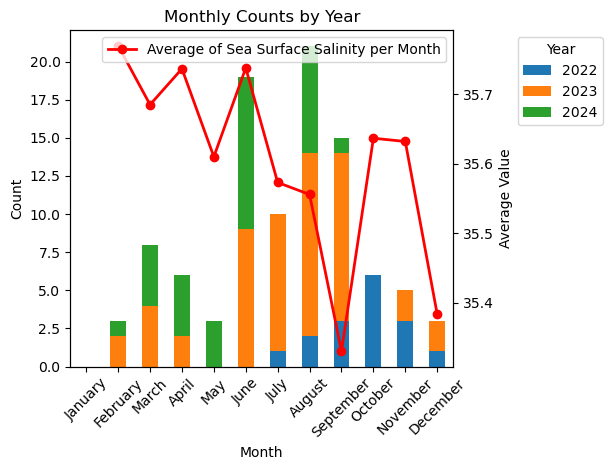

In [24]:
# Group by year and month (numeric)
pivot_df = df.groupby(['year', 'month']).size().unstack(fill_value=0)
# Reorder months (columns)
pivot_df = pivot_df.reindex(columns=month_order)

# Create the stacked bar chart and capture the axis
ax = pivot_df.T.plot(kind='bar', stacked=True)

# Calculate line data (grouped by month)
line_data = df.groupby('month')['sss'].mean()
# Reorder to match month_order
line_data = line_data.reindex(month_order)

# Create secondary y-axis for the line plot
ax2 = ax.twinx()
ax2.plot(range(len(month_order)), line_data.values, 
         color='red', marker='o', linewidth=2, 
         label='Average of Sea Surface Salinity per Month')
ax2.set_ylabel('Average Value')

# Customize labels
plt.title('Monthly Counts by Year')
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_labels, rotation=45)

# Legend handling (combine both legends if desired)
ax.legend(title='Year', bbox_to_anchor=(1.15, 1), loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

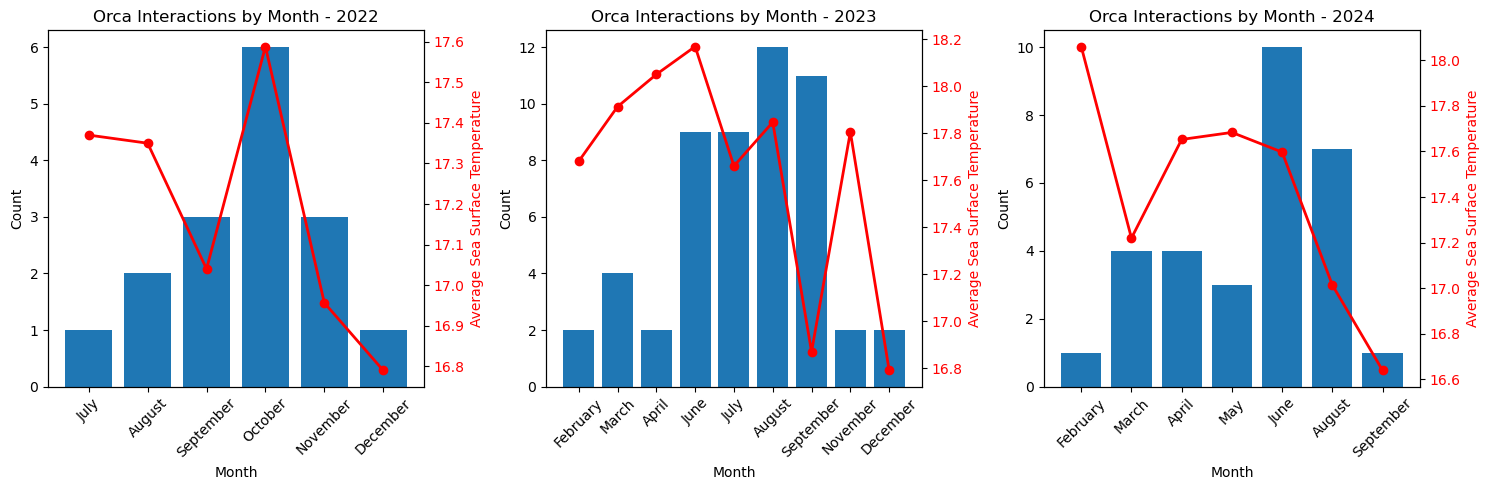

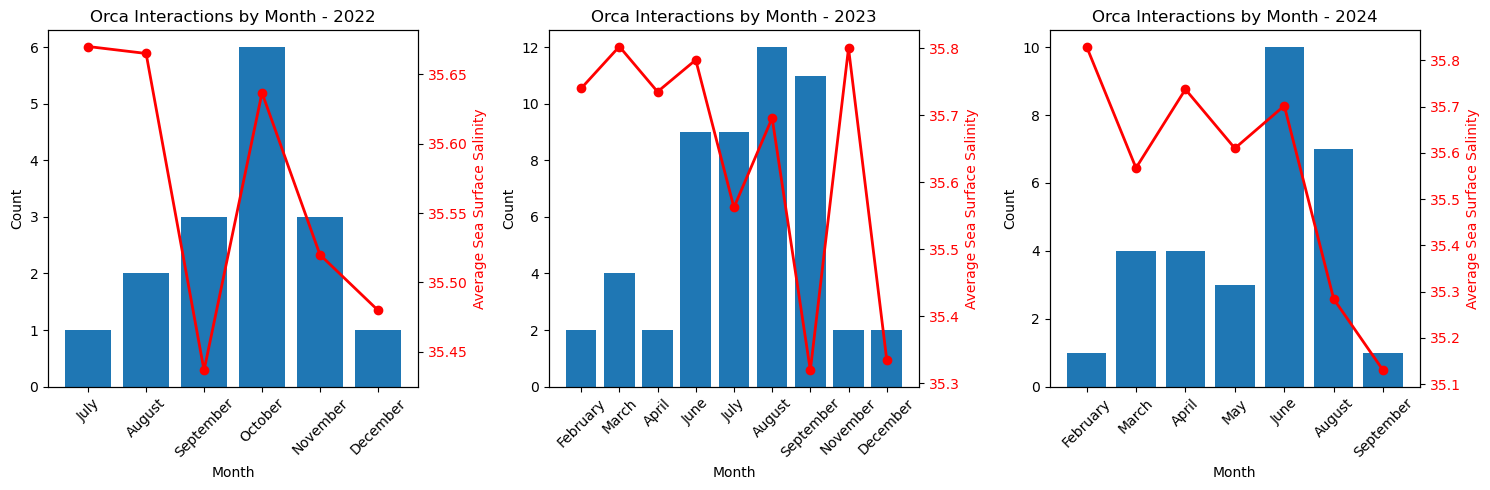

In [25]:
# Create a grid for 3 plots - Monthly interactions vs Average Sea Surface Temperature
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
years = [2022, 2023, 2024]

for idx, year in enumerate(years):
    # Get monthly counts
    monthly_counts = df[df['year'] == year].groupby(['month', 'month_name']).size().reset_index(name='count')
    monthly_counts = monthly_counts.sort_values('month')
    # Plot bar chart
    axes[idx].bar(monthly_counts['month_name'], monthly_counts['count'])
    axes[idx].set_title(f'Orca Interactions by Month - {year}')
    axes[idx].set_xlabel('Month')
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45) 
    # Calculate line data for the same year
    line_data = df[df['year'] == year].groupby(['month', 'month_name'])['sst'].mean().reset_index()
    line_data = line_data.sort_values('month')
    # Create secondary y-axis
    ax2 = axes[idx].twinx()
    ax2.plot(line_data['month_name'], line_data['sst'], 
             color='red', marker='o', linewidth=2, 
             label='Average Sea Surface Temperature')
    ax2.set_ylabel('Average Sea Surface Temperature', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
plt.tight_layout()
plt.show()


# Create a grid for 3 plots - Monthly interactions vs Average Sea Surface Salinity
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
years = [2022, 2023, 2024]

for idx, year in enumerate(years):
    # Get monthly counts
    monthly_counts = df[df['year'] == year].groupby(['month', 'month_name']).size().reset_index(name='count')
    monthly_counts = monthly_counts.sort_values('month')
    
    # Plot bar chart
    axes[idx].bar(monthly_counts['month_name'], monthly_counts['count'])
    axes[idx].set_title(f'Orca Interactions by Month - {year}')
    axes[idx].set_xlabel('Month')
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Calculate line data for the same year
    line_data = df[df['year'] == year].groupby(['month', 'month_name'])['sss'].mean().reset_index()
    line_data = line_data.sort_values('month')
    
    # Create secondary y-axis
    ax2 = axes[idx].twinx()
    ax2.plot(line_data['month_name'], line_data['sss'], 
             color='red', marker='o', linewidth=2, 
             label='Average Sea Surface Salinity')
    ax2.set_ylabel('Average Sea Surface Salinity', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
plt.tight_layout()
plt.show()


#### Notes:
The drop in temperature and salinity in September is likely due to seasonal upwelling. Also, there doesn't appear to be any obvious link between sea temperature/salinity and orca interactions.

## Data Exploration - bathymetry and shoredistance
-'bathymetry': Water depth at a location (often in meters, negative down)

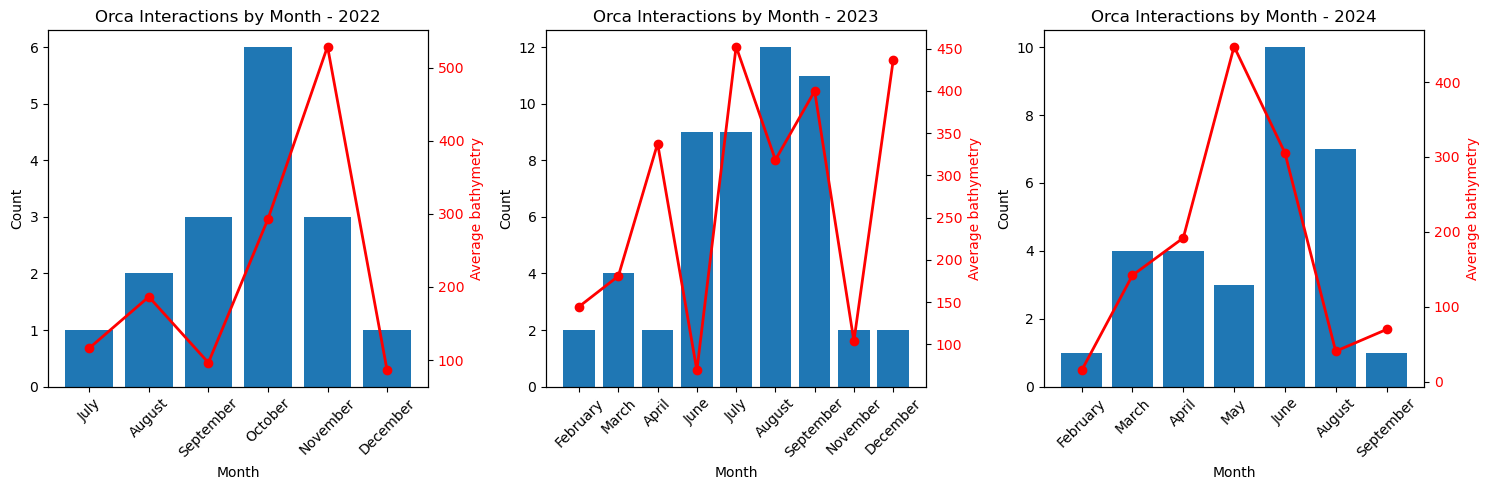

In [26]:
# Create a grid for 3 plots - Monthly interactions vs bathymetry
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
years = [2022, 2023, 2024]

for idx, year in enumerate(years):
    # Get monthly counts
    monthly_counts = df[df['year'] == year].groupby(['month', 'month_name']).size().reset_index(name='count')
    monthly_counts = monthly_counts.sort_values('month')
    
    # Plot bar chart
    axes[idx].bar(monthly_counts['month_name'], monthly_counts['count'])
    axes[idx].set_title(f'Orca Interactions by Month - {year}')
    axes[idx].set_xlabel('Month')
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Calculate line data for the same year
    line_data = df[df['year'] == year].groupby(['month', 'month_name'])['bathymetry'].mean().reset_index()
    line_data = line_data.sort_values('month')
    
    # Create secondary y-axis
    ax2 = axes[idx].twinx()
    ax2.plot(line_data['month_name'], line_data['bathymetry'], 
             color='red', marker='o', linewidth=2, 
             label='Average bathymetry')
    ax2.set_ylabel('Average bathymetry', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
plt.tight_layout()
plt.show()

#### Notes:
There doesn't appear to be an obvious pattern between water depth and orca interactions. If orcas preferred to interact with vessels at a particular depth, the red plotted line would be more linear. Some months see a high number of interaction at low depths, while other at high depths. There's also no clear pattern from month to month and months across the years.

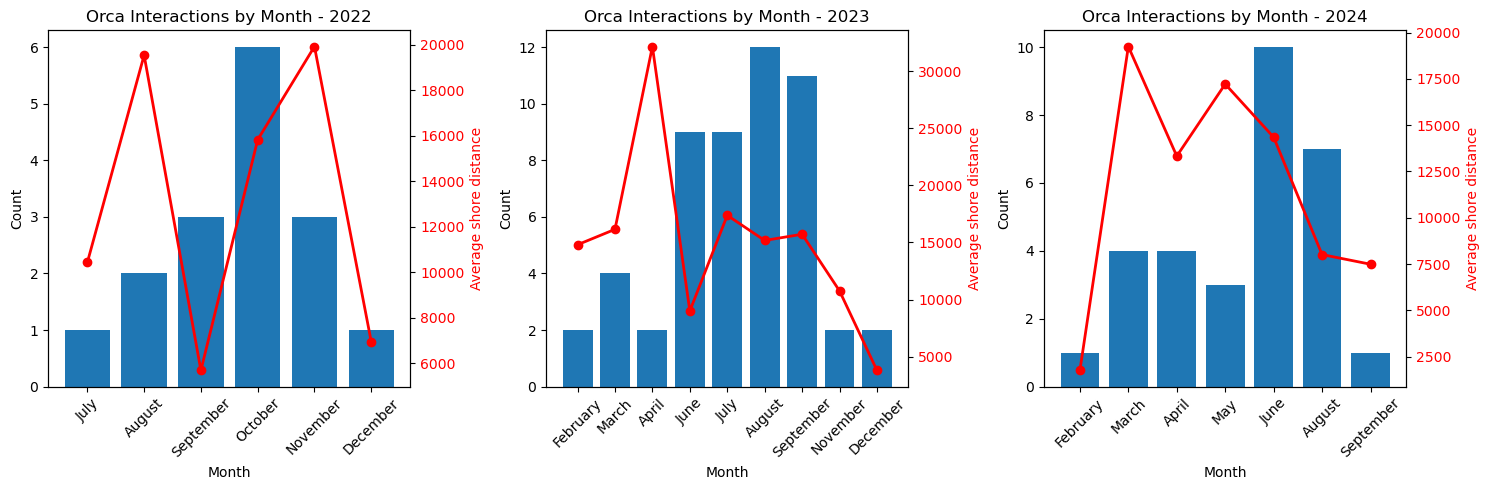

In [27]:
# Create a grid for 3 plots - Monthly interactions vs shoredistance
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
years = [2022, 2023, 2024]

for idx, year in enumerate(years):
    # Get monthly counts
    monthly_counts = df[df['year'] == year].groupby(['month', 'month_name']).size().reset_index(name='count')
    monthly_counts = monthly_counts.sort_values('month')
    
    # Plot bar chart
    axes[idx].bar(monthly_counts['month_name'], monthly_counts['count'])
    axes[idx].set_title(f'Orca Interactions by Month - {year}')
    axes[idx].set_xlabel('Month')
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Calculate line data for the same year
    line_data = df[df['year'] == year].groupby(['month', 'month_name'])['shoredistance'].mean().reset_index()
    line_data = line_data.sort_values('month')
    
    # Create secondary y-axis
    ax2 = axes[idx].twinx()
    ax2.plot(line_data['month_name'], line_data['shoredistance'], 
             color='red', marker='o', linewidth=2, 
             label='Average shore distance')
    ax2.set_ylabel('Average shore distance', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
plt.tight_layout()
plt.show()

#### Notes:
Again, there's no obvious pattern between orca interactions and shore distance. However, one interesting trend in 2023 was most interactions during the summer months occurring between 15000 and 20000 meters from shore.

## Explore Correlation Coefficients 
Correlation values range from -1 to 1:

- 1: Perfect positive correlation
- 0: No correlation
- -1: Perfect negative correlation

Positive correlation means the variables move in the same direction:
- As one variable increases, the other also increases
- As one variable decreases, the other also decreases

Negative correlation means the variables move in opposite directions:
- As one variable increases, the other decreases
- As one variable decreases, the other increases

In [28]:
# Correlation matrix for all numeric columns - default is Pearson's correlation
correlation_matrix = df.corr()
print(correlation_matrix)

                                        day     month      year  \
day                                1.000000  0.066063  0.338441   
month                              0.066063  1.000000 -0.333413   
year                               0.338441 -0.333413  1.000000   
decimalLatitude                    0.097428  0.255003  0.008794   
decimalLongitude                  -0.090333 -0.164876 -0.003966   
bathymetry                        -0.032378  0.096179 -0.066597   
shoredistance                     -0.088076  0.018503 -0.040026   
sss                               -0.095704 -0.215472 -0.029043   
sst                               -0.150016 -0.215583  0.014262   
total_interactions_per_month_2022 -0.202505  0.534897 -0.583133   
total_interactions_per_month_2023  0.119082  0.237646  0.124420   
total_interactions_per_month_2024  0.241396 -0.112271  0.458354   

                                   decimalLatitude  decimalLongitude  \
day                                       0.097428      

/var/folders/7v/svj7dd452mbgwyxggmw16scc0000gn/T/ipykernel_51818/3331750648.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [29]:
# To see correlations with a specific column
#print(df.corr()['sss'].sort_values(ascending=False))

/var/folders/7v/svj7dd452mbgwyxggmw16scc0000gn/T/ipykernel_51818/1159400794.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0,


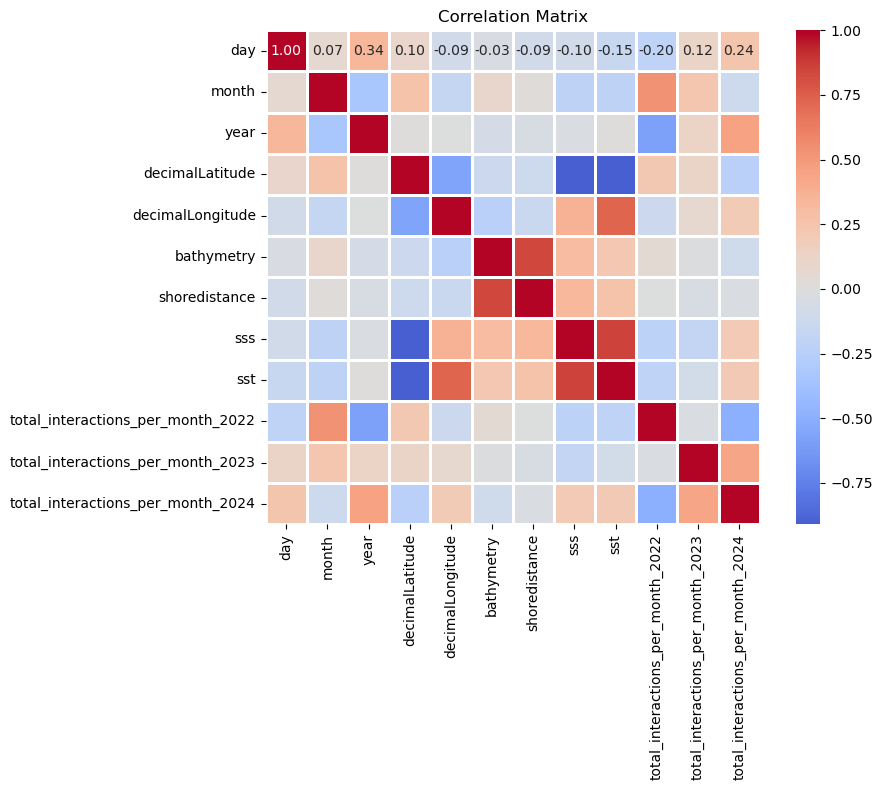

In [30]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

#### Notes:
The main variables the show a strong correlation are 'sst' and 'sss' vs 'decimalLatitude'. The correlation is negative, suggesting that as latitude increases, sst and sss would decrease, and visa versa. Interestingly, 'sst' and 'decimalLongitude' appear to be highly correlated. 'sss' and 'sst' also have a very strong positive correlation. The correlation coefficients also indicate that there's no clear correlation between the different metrics we have in our data, and orca interactions. 

It's quite possible that orca interaction relate to other variables that are not in this dataset, such as blue-fin tuna abundance/location, quantity of vessels in the water, type of vessels in the water, age of orcas or specific pods, weather events, etc. There is data and exploration on some of these topics (such as age and individual orcas involved), but not in this dataset. It would be interesting to add this data to our dataset if it can be aquired. 

In [31]:
#save dataframe
df.to_csv("Modified_OccurrenceDataset_simplified.csv", index=False)